In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
spotify= pd.read_parquet("C:\\Users\\User\\Downloads\\0000 (1) (2).parquet")

In [6]:
spotify

Unnamed: 0                track_id                 artists  \
0                0  5SuOikwiRyPMVoIQDJUgSV             Gen Hoshino   
1                1  4qPNDBW1i3p13qLCt0Ki3A            Ben Woodward   
2                2  1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
3                3  6lfxq3CG4xtTiEg7opyCyx            Kina Grannis   
4                4  5vjLSffimiIP26QG5WcN2K        Chord Overstreet   
...            ...                     ...                     ...   
113995      113995  2C3TZjDRiAzdyViavDJ217           Rainy Lullaby   
113996      113996  1hIz5L4IB9hN3WRYPOCGPw           Rainy Lullaby   
113997      113997  6x8ZfSoqDjuNa5SVP5QjvX           Cesária Evora   
113998      113998  2e6sXL2bYv4bSz6VTdnfLs        Michael W. Smith   
113999      113999  2hETkH7cOfqmz3LqZDHZf5           Cesária Evora   

                                               album_name  \
0                                                  Comedy   
1                                        Ghost (Acoustic)   
2                                          To Begin Again   
3       Crazy Rich Asians (Original Motion Picture Sou...   
4                                                 Hold On   
...                                                   ...   
113995  #mindfulness - Soft Rain for Mindful Meditatio...   
113996  #mindfulness - Soft Rain for Mindful Meditatio...   
113997                                            Best Of   
113998                                  Change Your World   
113999                                     Miss Perfumado   

                        track_name  popularity  duration_ms  explicit  \
0                           Comedy          73       230666     False   
1                 Ghost - Acoustic          55       149610     False   
2                   To Begin Again          57       210826     False   
3       Can't Help Falling In Love          71       201933     False   
4                          Hold On          82       198853     False   
...                            ...         ...          ...       ...   
113995         Sleep My Little Boy          21       384999     False   
113996            Water Into Light          22       385000     False   
113997              Miss Perfumado          22       271466     False   
113998                     Friends          41       283893     False   
113999                   Barbincor          22       241826     False   

        danceability  energy  ...  loudness  mode  speechiness  acousticness  \
0              0.676  0.4610  ...    -6.746     0       0.1430        0.0322   
1              0.420  0.1660  ...   -17.235     1       0.0763        0.9240   
2              0.438  0.3590  ...    -9.734     1       0.0557        0.2100   
3              0.266  0.0596  ...   -18.515     1       0.0363        0.9050   
4              0.618  0.4430  ...    -9.681     1       0.0526        0.4690   
...              ...     ...  ...       ...   ...          ...           ...   
113995         0.172  0.2350  ...   -16.393     1       0.0422        0.6400   
113996         0.174  0.1170  ...   -18.318     0       0.0401        0.9940   
113997         0.629  0.3290  ...   -10.895     0       0.0420        0.8670   
113998         0.587  0.5060  ...   -10.889     1       0.0297        0.3810   
113999         0.526  0.4870  ...   -10.204     0       0.0725        0.6810   

        instrumentalness  liveness  valence    tempo  time_signature  \
0               0.000001    0.3580   0.7150   87.917               4   
1               0.000006    0.1010   0.2670   77.489               4   
2               0.000000    0.1170   0.1200   76.332               4   
3               0.000071    0.1320   0.1430  181.740               3   
4               0.000000    0.0829   0.1670  119.949               4   
...                  ...       ...      ...      ...             ...   
113995          0.928000    0.0863   0.0339  125.995               5   
113996          0.97

In [4]:
# checking the data set shape
spotify.shape

(114000, 21)

In [5]:
# checking the dataset datatypes
spotify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

In [6]:
# checking the null values
spotify.isnull().sum()

Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

# EDA PART


track_id: Unique Spotify identifier for each track.
artists: Names of artists involved in the track, separated by ';' for multiple artists.
album_name: Title of the album containing the track.
track_name: Title of the individual track.


Text(0, 0.5, 'Frequency')

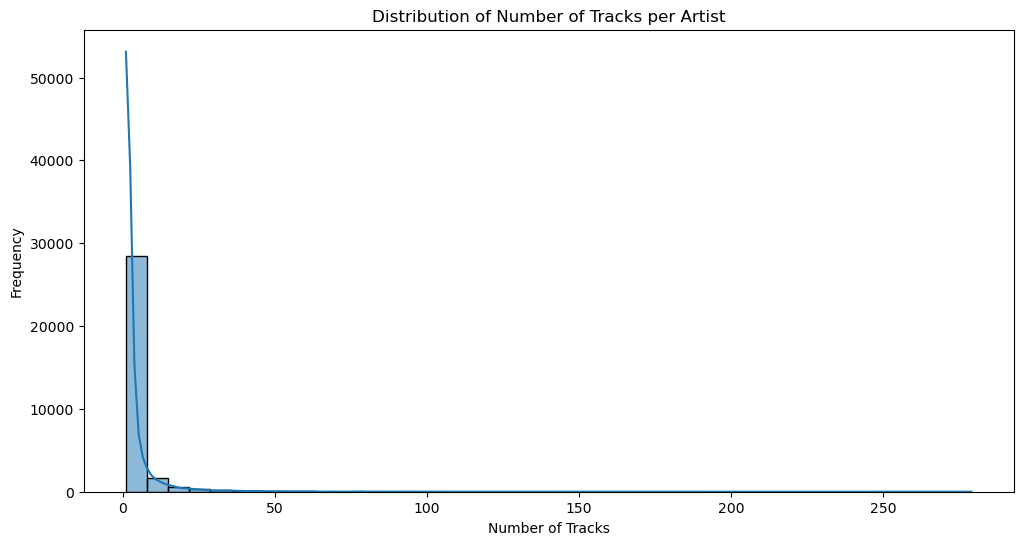

In [7]:
# Count the number of tracks per artist
tracks_per_artist = spotify['artists'].value_counts()
# Plot the distribution using Seaborn
plt.figure(figsize=(12, 6))
sns.histplot(tracks_per_artist, bins=40, kde=True)
plt.title('Distribution of Number of Tracks per Artist')
plt.xlabel('Number of Tracks')
plt.ylabel('Frequency')

In [8]:
# Calculate the mean popularity per artist
mean_popularity_per_artist = spotify.groupby('artists')['popularity'].mean()
top_artists_mean_popularity = mean_popularity_per_artist.sort_values(ascending=False).head(10)
top_artists_mean_popularity

artists
Sam Smith;Kim Petras           100.0
Bizarrap;Quevedo                99.0
Manuel Turizo                   98.0
Bad Bunny;Chencho Corleone      97.0
Bad Bunny;Bomba Estéreo         94.5
Joji                            94.0
Beyoncé                         93.0
Harry Styles                    92.0
Rema;Selena Gomez               92.0
Rauw Alejandro;Lyanno;Brray     91.0
Name: popularity, dtype: float64

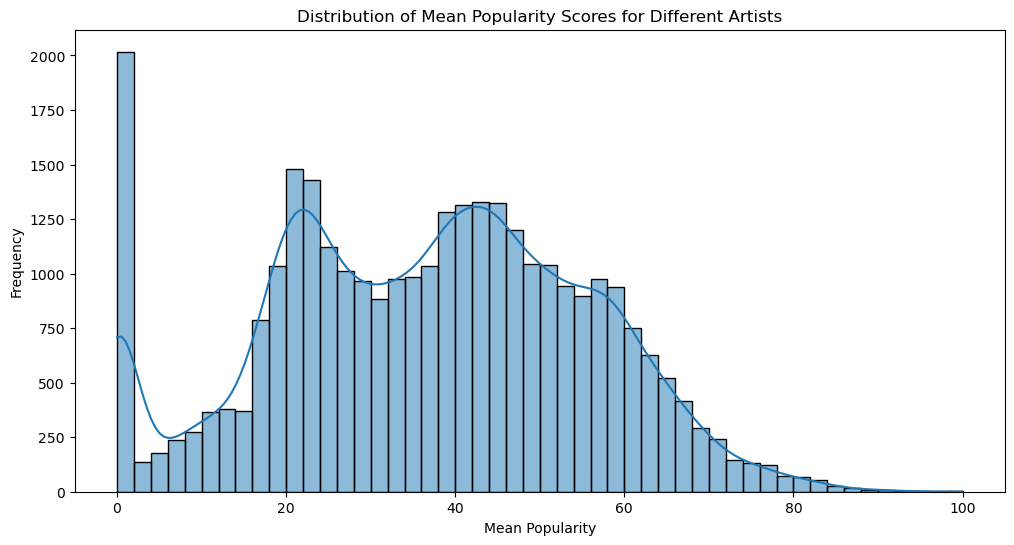

In [9]:
# Visualize the distribution of mean popularity scores for different artists
plt.figure(figsize=(12, 6))
sns.histplot(mean_popularity_per_artist, bins=50, kde=True)
plt.title('Distribution of Mean Popularity Scores for Different Artists')
plt.xlabel('Mean Popularity')
plt.ylabel('Frequency')
plt.show()


In [10]:
# Calculate the sum popularity per artist
sum_popularity_per_artist = spotify.groupby('artists')['popularity'].sum()
# Identify the top artists based on sum popularity
top_artists_sum_popularity = sum_popularity_per_artist.sort_values(ascending=False).head(10)
print(top_artists_sum_popularity)

artists
The Beatles              17021
Linkin Park              12560
BTS                      10358
Prateek Kuhad            10054
Elvis Presley             9307
Arctic Monkeys            8461
Charlie Brown Jr.         7136
Red Hot Chili Peppers     6540
CoComelon                 6023
Rammstein                 5825
Name: popularity, dtype: int64


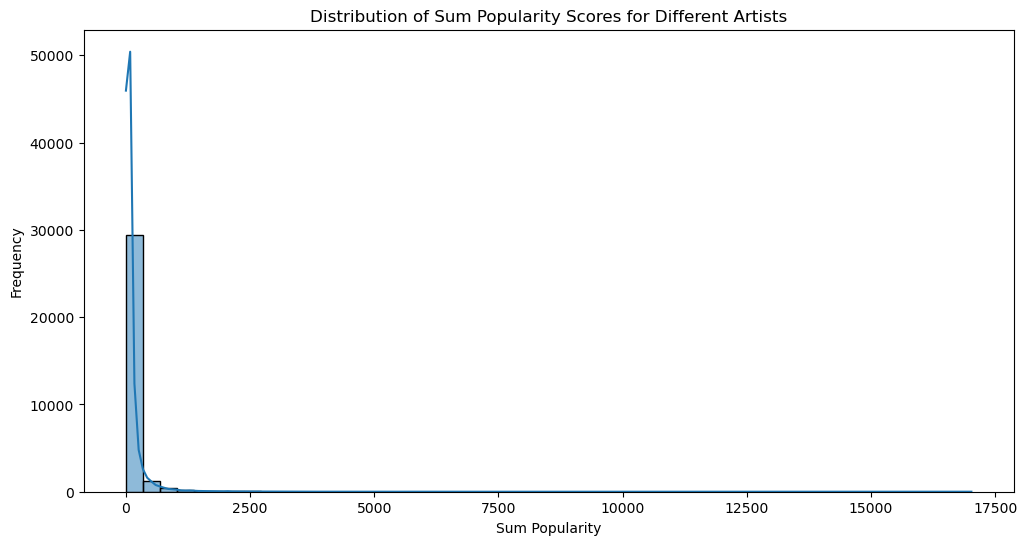

In [11]:
# Visualize the distribution of sum popularity scores for different artists
plt.figure(figsize=(12, 6))
sns.histplot(sum_popularity_per_artist, bins=50, kde=True)
plt.title('Distribution of Sum Popularity Scores for Different Artists')
plt.xlabel('Sum Popularity')
plt.ylabel('Frequency')
plt.show()


In [12]:
# Group by genre and calculate the mean popularity for each genre
genre_popularity = spotify.groupby('track_genre')['popularity'].mean()

genre_popularity

track_genre
acoustic       42.483
afrobeat       24.399
alt-rock       33.943
alternative    24.337
ambient        44.191
                ...  
techno         39.042
trance         37.635
trip-hop       34.460
turkish        40.698
world-music    41.873
Name: popularity, Length: 114, dtype: float64

In [13]:
#popularity: A score from 0 to 100 indicating the track's popularity, where 100 is the most popular. This score is algorithmically determined, primarily based on the track's play count and the recency of these plays. A track's current play frequency influences its popularity more than past plays. Tracks appearing in multiple forms (like in an album and a single) have separate ratings. Note that artist and album popularity are also derived from track popularity.

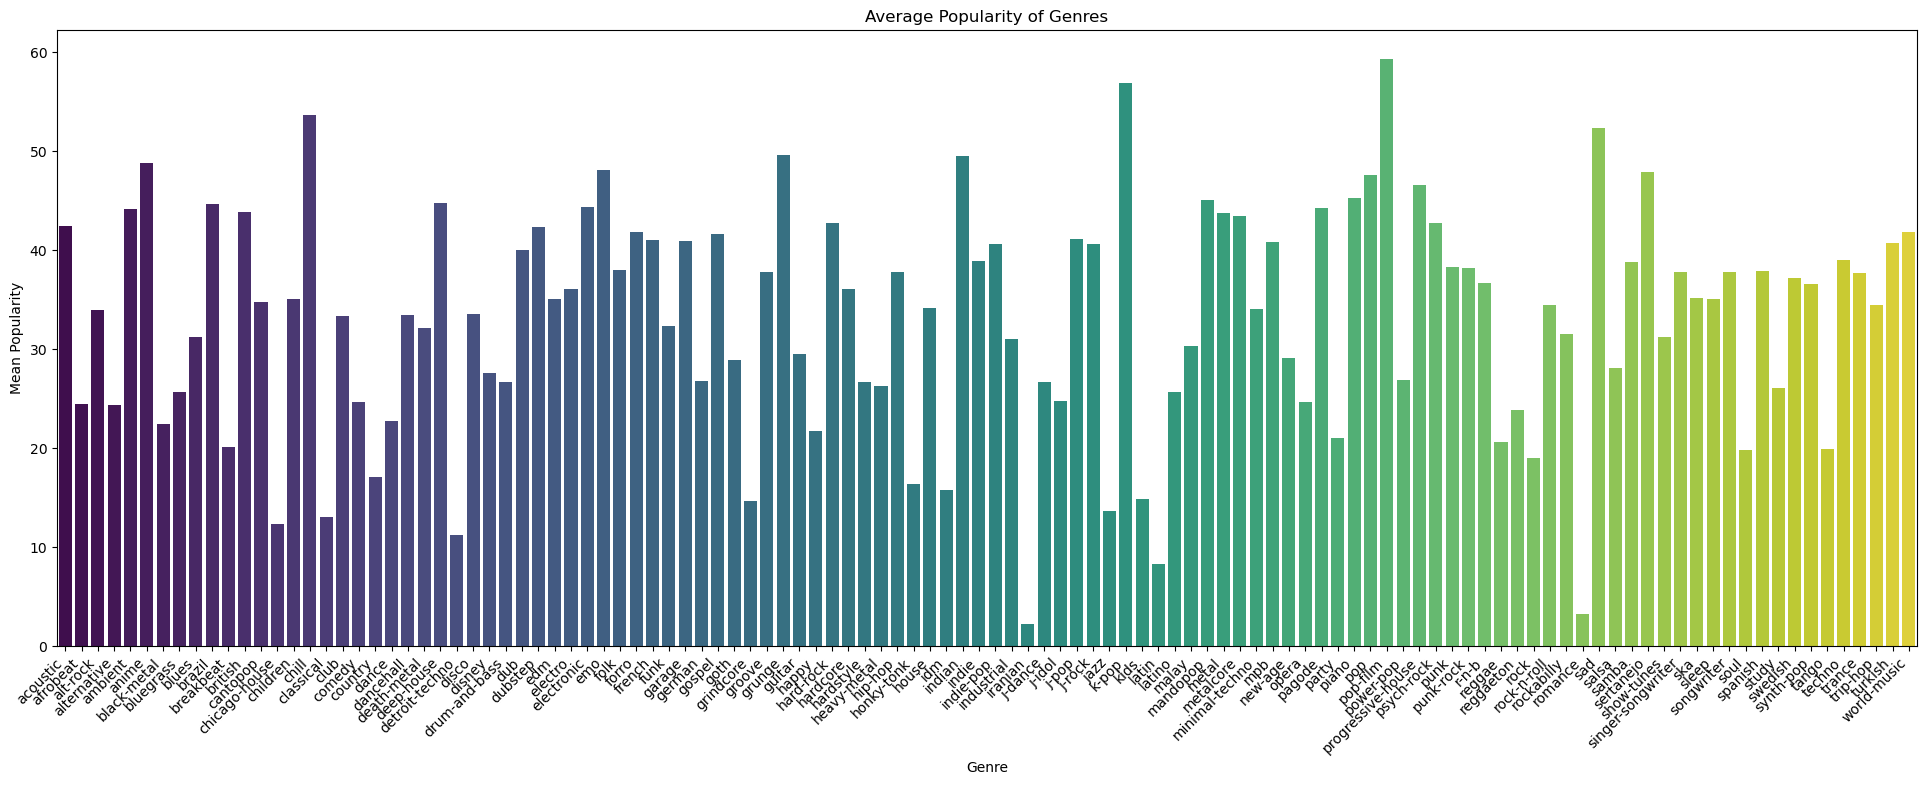

In [14]:

# Visualize the distribution of genre popularity
plt.figure(figsize=(24, 8))
sns.barplot(x=genre_popularity.index, y=genre_popularity.values, palette='viridis')
plt.title('Average Popularity of Genres')
plt.xlabel('Genre')
plt.ylabel('Mean Popularity')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

duration_ms: Length of the track in milliseconds.

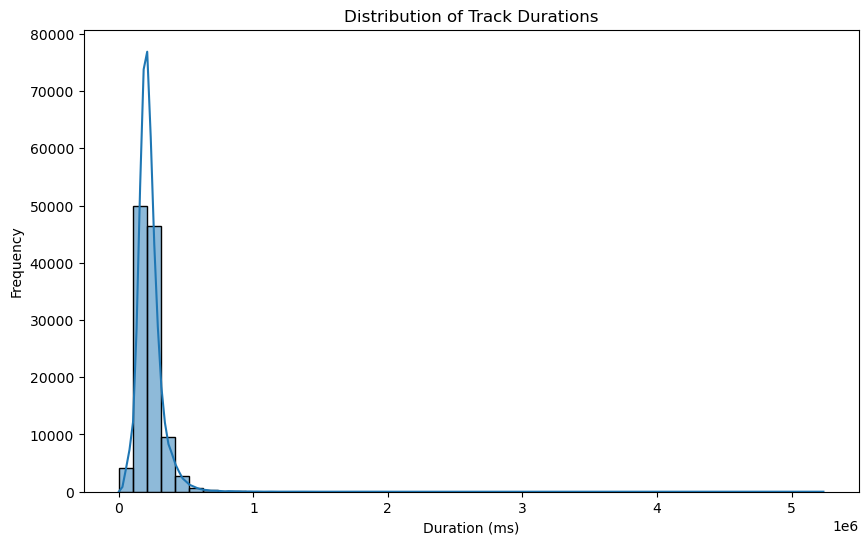

In [15]:

# Plot the distribution of track durations
plt.figure(figsize=(10, 6))
sns.histplot(spotify['duration_ms'], bins=50, kde=True)
plt.title('Distribution of Track Durations')
plt.xlabel('Duration (ms)')
plt.ylabel('Frequency')
plt.show()


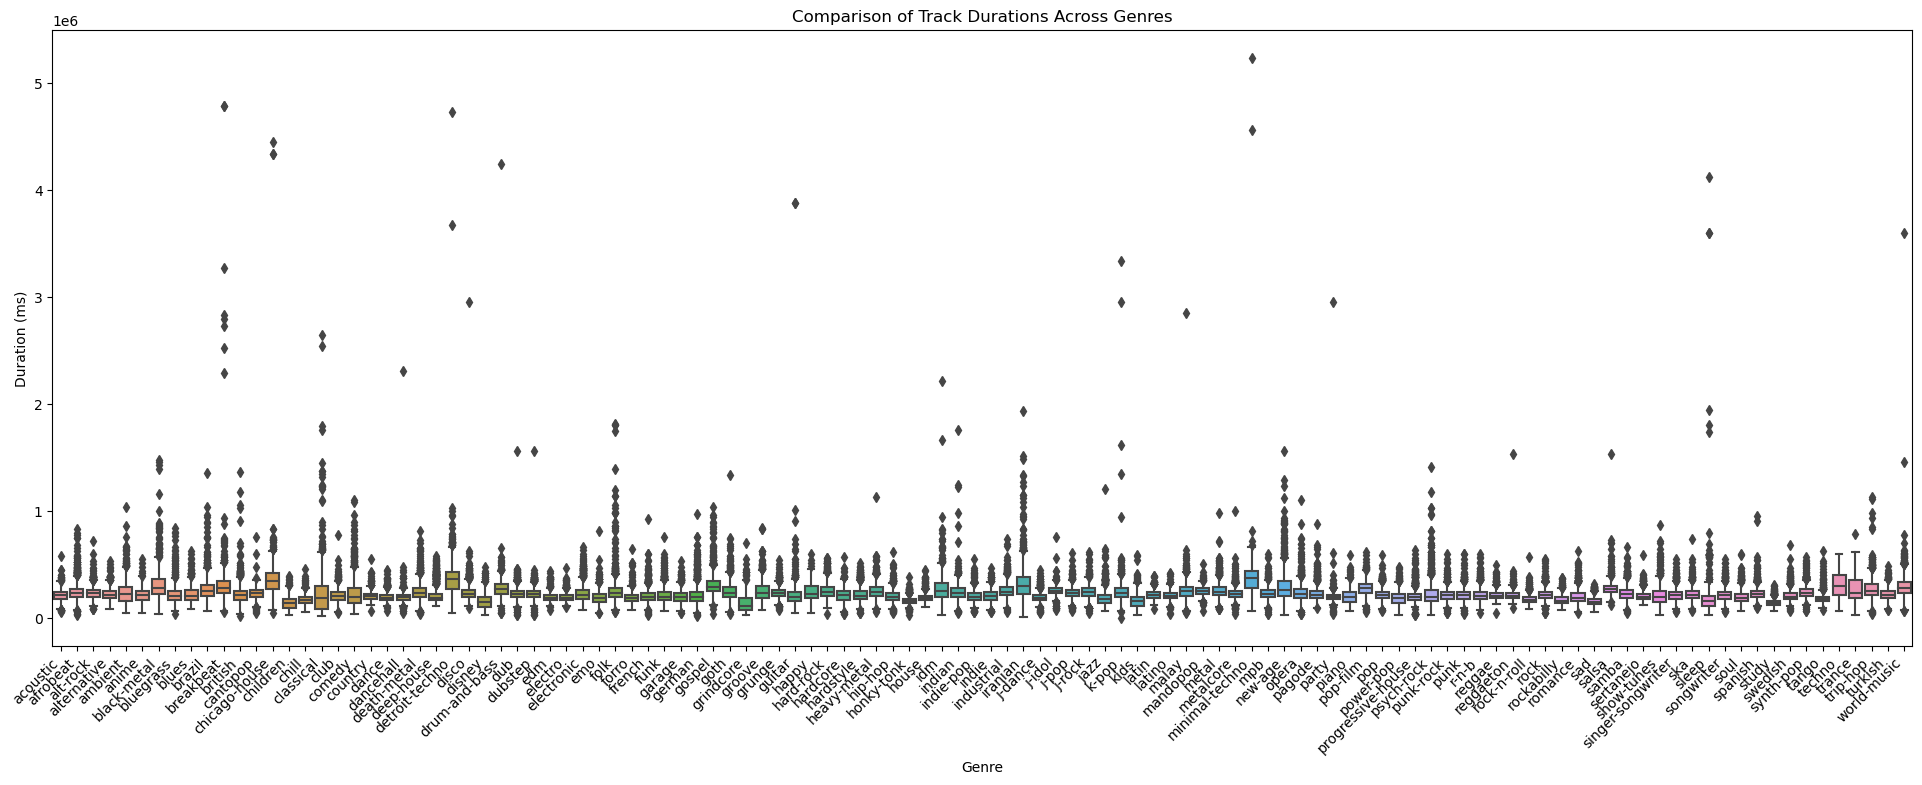

In [16]:
# Box plot to compare track durations across genres
plt.figure(figsize=(24, 8))
sns.boxplot(x='track_genre', y='duration_ms', data=spotify)
plt.title('Comparison of Track Durations Across Genres')
plt.xlabel('Genre')
plt.ylabel('Duration (ms)')
plt.xticks(rotation=45, ha='right')
plt.show()


explicit: Indicates if the track contains explicit lyrics ('true' for explicit content; 'false' for no explicit content or if it's unknown).

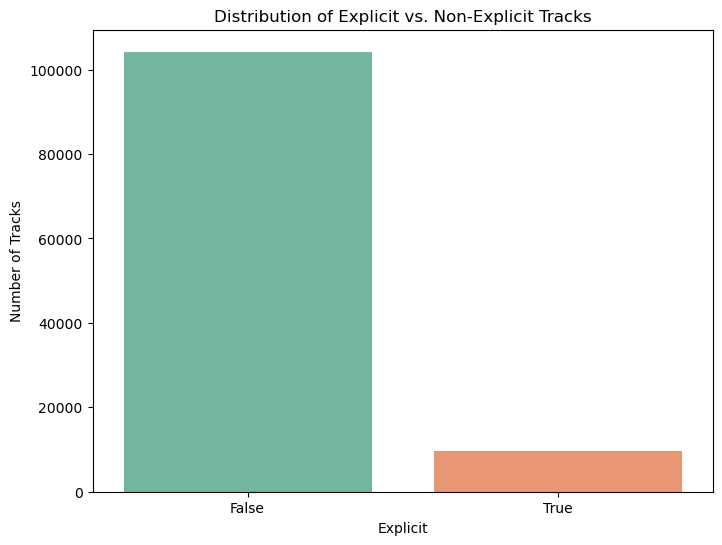

In [17]:
# Count the number of explicit and non-explicit tracks
explicit_counts = spotify['explicit'].value_counts()

# Plot the distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=explicit_counts.index, y=explicit_counts.values, palette='Set2')
plt.title('Distribution of Explicit vs. Non-Explicit Tracks')
plt.xlabel('Explicit')
plt.ylabel('Number of Tracks')
plt.show()


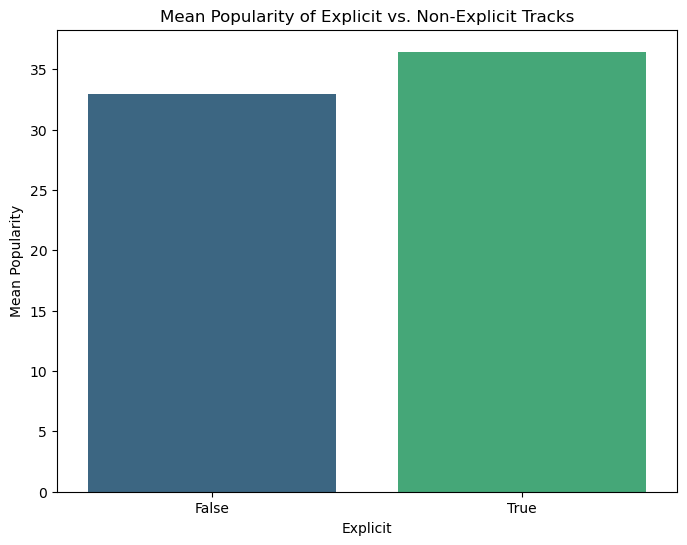

In [18]:
# Group by explicitness and calculate the mean popularity
explicit_popularity = spotify.groupby('explicit')['popularity'].mean()

# Plot the comparison
plt.figure(figsize=(8, 6))
sns.barplot(x=explicit_popularity.index, y=explicit_popularity.values, palette='viridis')
plt.title('Mean Popularity of Explicit vs. Non-Explicit Tracks')
plt.xlabel('Explicit')
plt.ylabel('Mean Popularity')
plt.show()

danceability: A metric ranging from 0.0 (least danceable) to 1.0 (most danceable), assessing a track's suitability for dancing based on tempo, rhythm, beat strength, and general regularity.

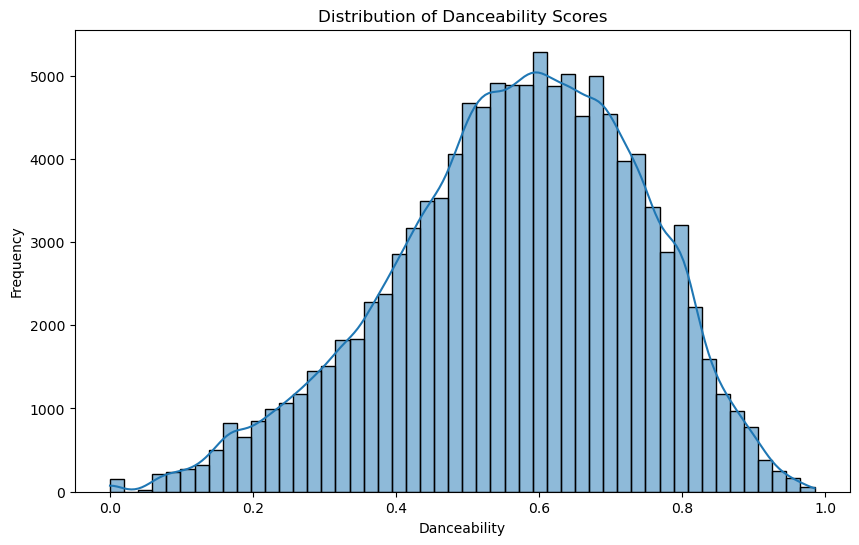

In [19]:
# Plot the distribution of danceability scores
plt.figure(figsize=(10, 6))
sns.histplot(spotify['danceability'], bins=50, kde=True)
plt.title('Distribution of Danceability Scores')
plt.xlabel('Danceability')
plt.ylabel('Frequency')
plt.show()

energy: A perceptual measure ranging from 0.0 to 1.0, gauging the track's intensity and activity. Tracks that are fast, loud, and noisy are considered high energy, like death metal, whereas a Bach prelude would be low energy.

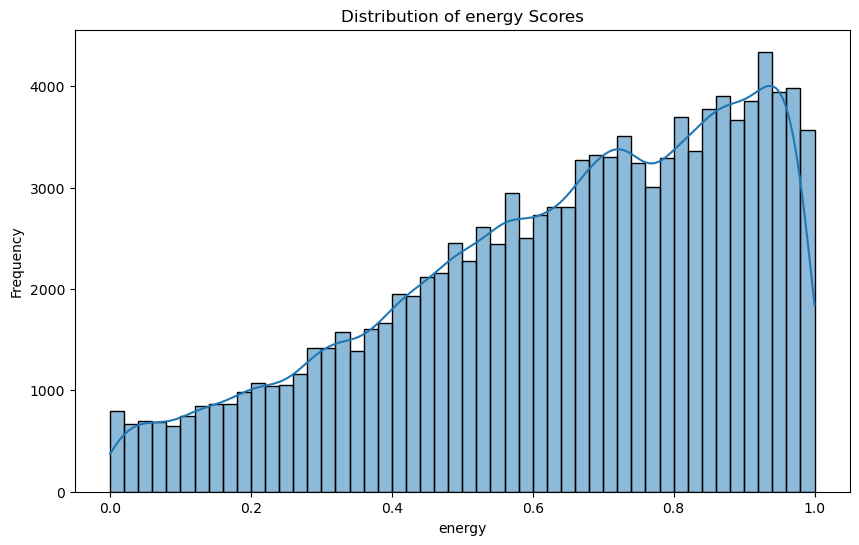

In [20]:
# Plot the distribution of energy scores
plt.figure(figsize=(10, 6))
sns.histplot(spotify['energy'], bins=50, kde=True)
plt.title('Distribution of energy Scores')
plt.xlabel('energy')
plt.ylabel('Frequency')
plt.show()

loudness: Measures the average loudness of the track in decibels (dB).

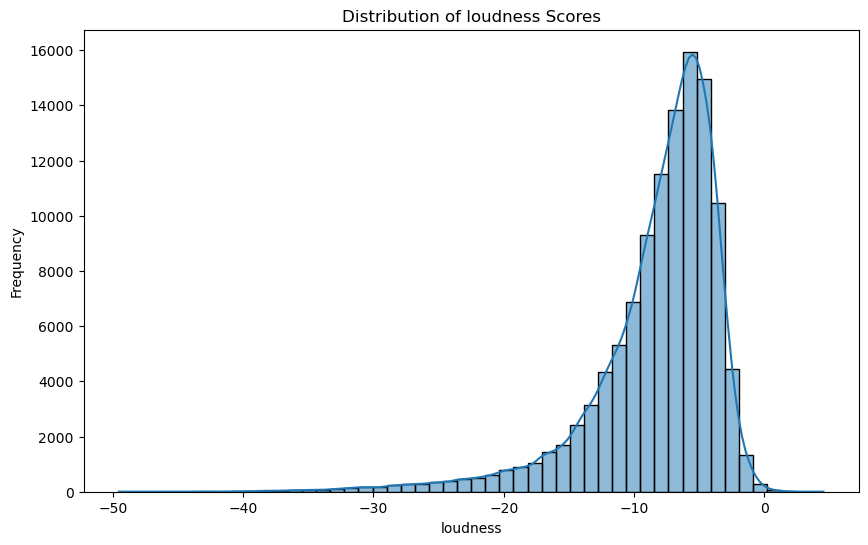

In [21]:
# Plot the distribution of loudness scores
plt.figure(figsize=(10, 6))
sns.histplot(spotify['loudness'], bins=50, kde=True)
plt.title('Distribution of loudness Scores')
plt.xlabel('loudness')
plt.ylabel('Frequency')
plt.show()

In [22]:
mode = spotify['mode'].value_counts()
mode


mode
1    72681
0    41319
Name: count, dtype: int64

mode: Indicates the track's modality, with 1 for major mode and 0 for minor mode, determining the type of scale that forms its melodic basis

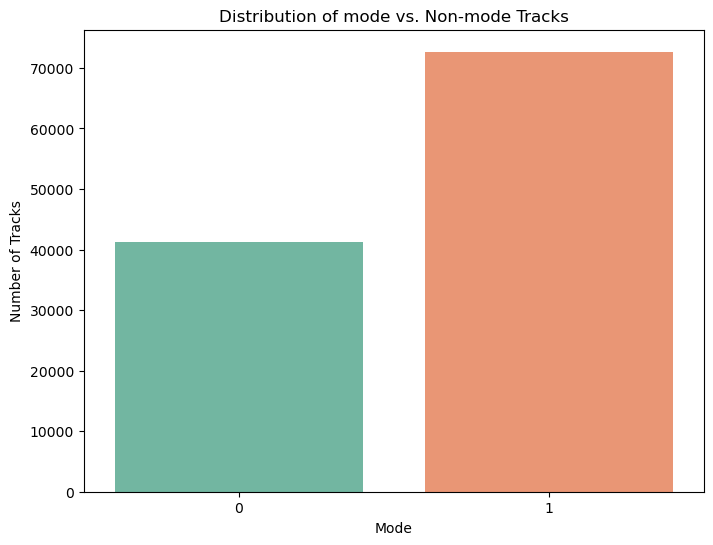

In [23]:

mode = spotify['mode'].value_counts()
# Count the occurrences of each mode
mode_counts = spotify['mode'].value_counts()

# Plot the distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=mode_counts.index, y=mode_counts.values, palette='Set2')
plt.title('Distribution of mode vs. Non-mode Tracks')
plt.xlabel('Mode')
plt.ylabel('Number of Tracks')
plt.show()



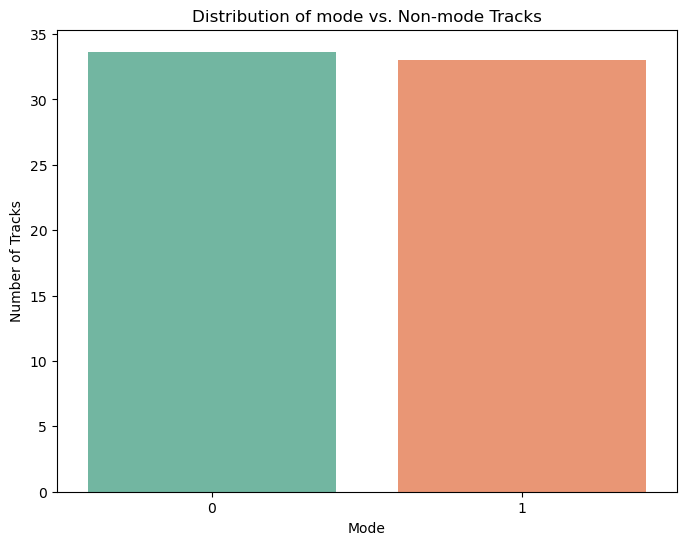

In [24]:

# Count the occurrences of each mode
mode_mean = spotify.groupby('mode')['popularity'].mean()

# Plot the distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=mode_mean.index, y=mode_mean.values, palette='Set2')
plt.title('Distribution of mode vs. Non-mode Tracks')
plt.xlabel('Mode')
plt.ylabel('Number of Tracks')
plt.show()


In [25]:
#speechiness: Assesses the extent of spoken words in a track. Values near 1.0 suggest a predominance of speech (like talk shows or audio books). Scores above 0.66 typically indicate tracks composed entirely of spoken words. Those between 0.33 and 0.66 may include a mix of music and speech, such as in rap music. Scores below 0.33 generally represent music or non-speech tracks

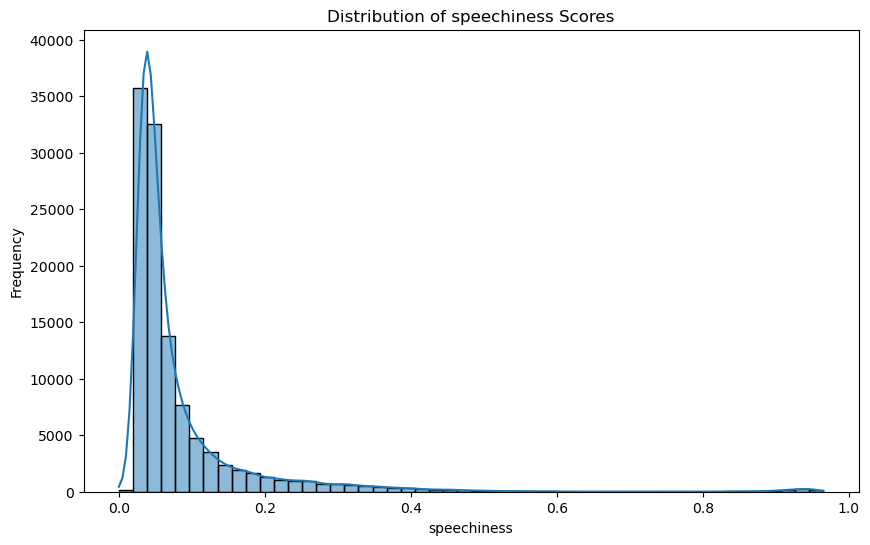

In [26]:
# Plot the distribution of speechiness scores
plt.figure(figsize=(10, 6))
sns.histplot(spotify['speechiness'], bins=50, kde=True)
plt.title('Distribution of speechiness Scores')
plt.xlabel('speechiness')
plt.ylabel('Frequency')
plt.show()

A scale from 0.0 to 1.0 indicating the likelihood of the track being acoustic, with 1.0 signifying high confidence in its acoustic nature.

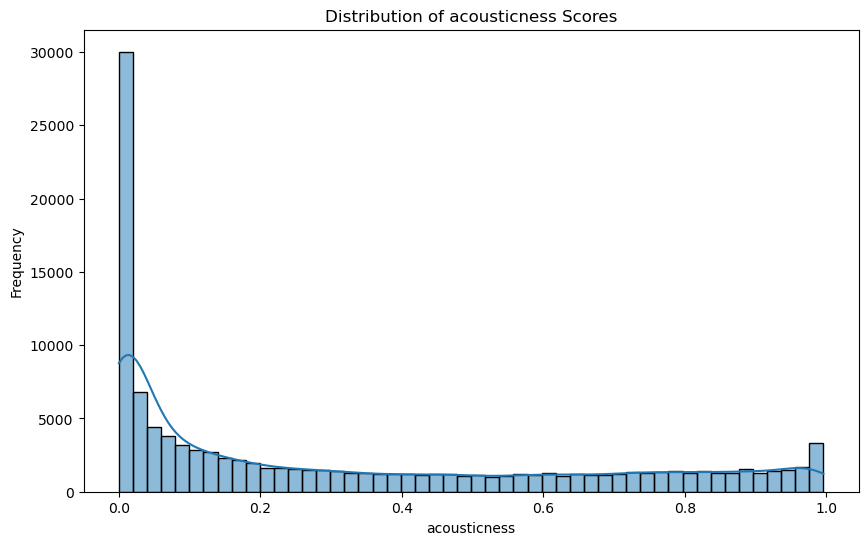

In [27]:
# Plot the distribution of acoustic scores
plt.figure(figsize=(10, 6))
sns.histplot(spotify['acousticness'], bins=50, kde=True)
plt.title('Distribution of acousticness Scores')
plt.xlabel('acousticness')
plt.ylabel('Frequency')
plt.show()

instrumentalness: Estimates the absence of vocals in a track. Vocal-like sounds ("ooh" and "aah") are considered instrumental, whereas rap or spoken words are categorized as vocal. Values closer to 1.0 suggest a higher probability of the track lacking vocal content.

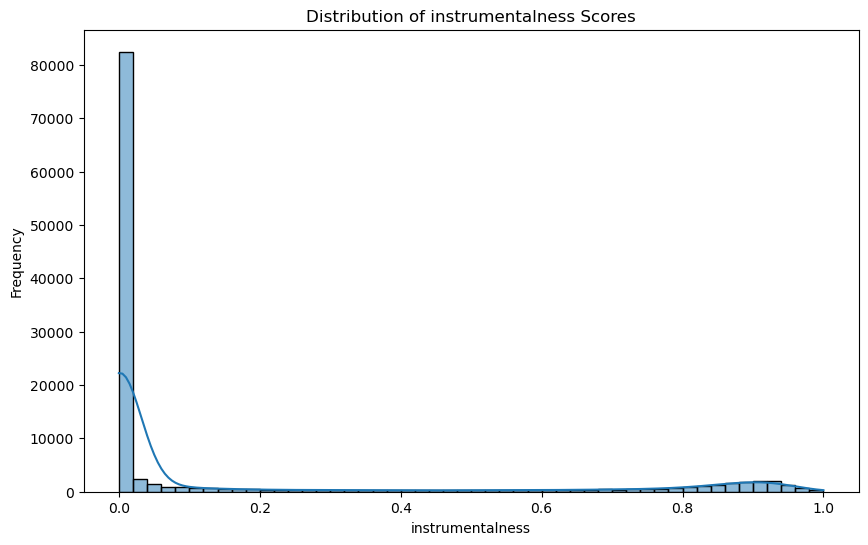

In [28]:
# Plot the distribution of instrumentalness scores
plt.figure(figsize=(10, 6))
sns.histplot(spotify['instrumentalness'], bins=50, kde=True)
plt.title('Distribution of instrumentalness Scores')
plt.xlabel('instrumentalness')
plt.ylabel('Frequency')
plt.show()

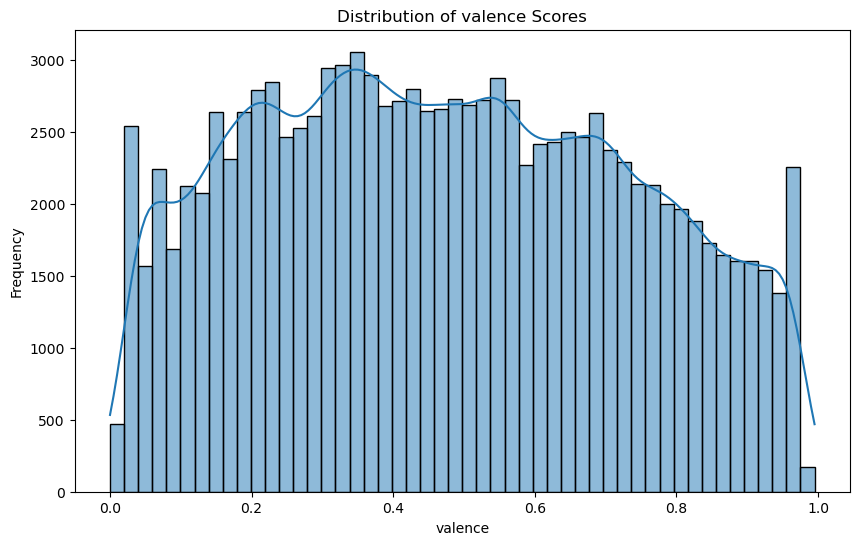

In [29]:

plt.figure(figsize=(10, 6))
sns.histplot(spotify['valence'], bins=50, kde=True)
plt.title('Distribution of valence Scores')
plt.xlabel('valence')
plt.ylabel('Frequency')
plt.show()

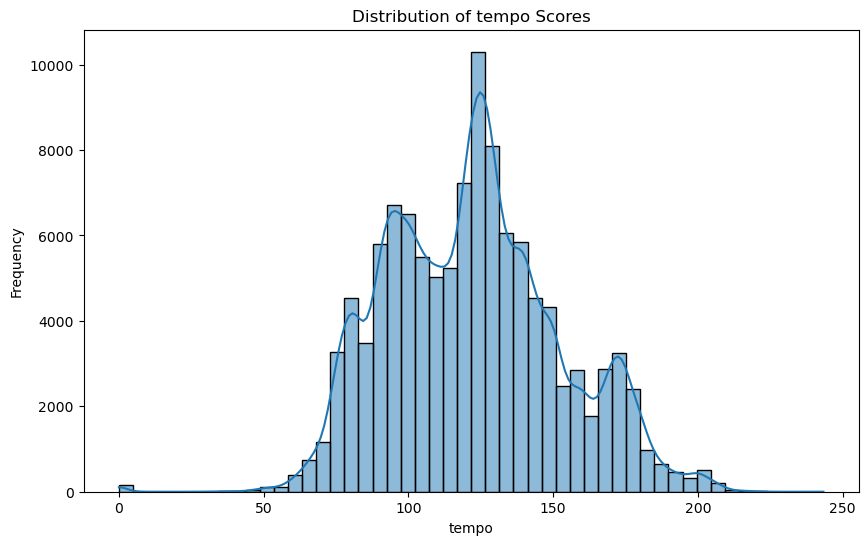

In [30]:
# Plot the distribution of tempo scores
plt.figure(figsize=(10, 6))
sns.histplot(spotify['tempo'], bins=50, kde=True)
plt.title('Distribution of tempo Scores')
plt.xlabel('tempo')
plt.ylabel('Frequency')
plt.show()

time_signature: Provides an estimated time signature for the track, which is a musical notation indicating the number of beats in each bar (or measure). This value varies between 3 to 7, representing time signatures from 3/4 to 7/4.


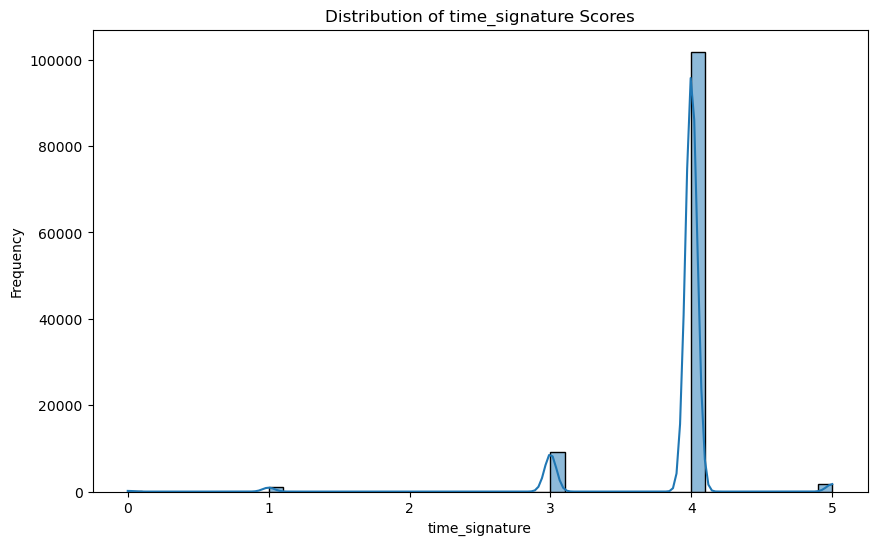

In [31]:
# Plot the distribution of time_signature scores
plt.figure(figsize=(10, 6))
sns.histplot(spotify['time_signature'], bins=50, kde=True)
plt.title('Distribution of time_signature Scores')
plt.xlabel('time_signature')
plt.ylabel('Frequency')
plt.show()

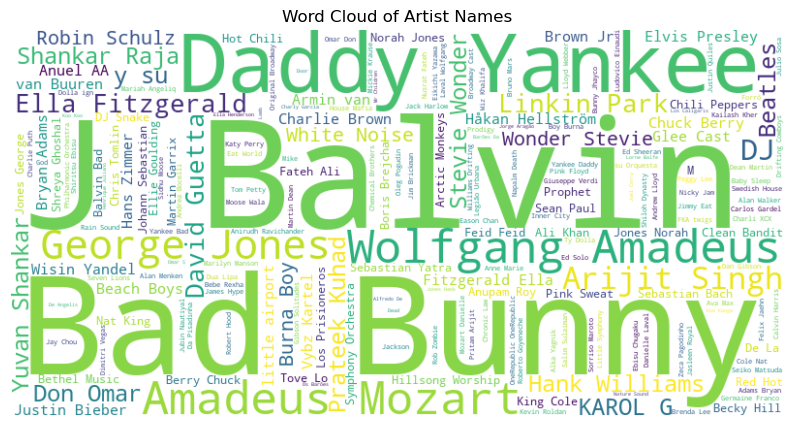

In [32]:
from wordcloud import WordCloud
# Concatenate all artist names into a single string
all_artists_text = ' '.join(spotify['artists'].astype(str))

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_artists_text)

# Display the generated word cloud image
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Artist Names')
plt.show()


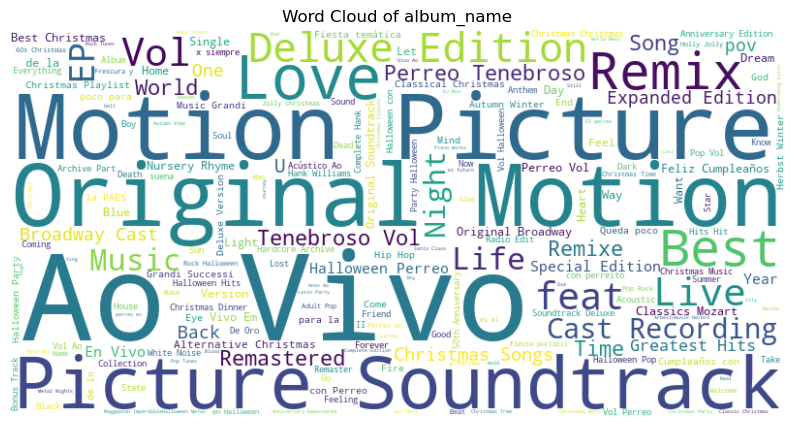

In [33]:
# Concatenate all artist names into a single string
all_artists_text = ' '.join(spotify['album_name'].astype(str))

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_artists_text)

# Display the generated word cloud image
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of album_name')
plt.show()

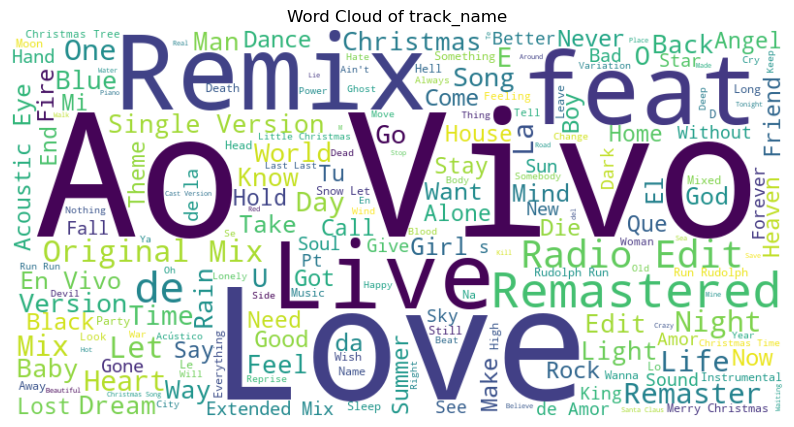

In [34]:
# Concatenate all artist names into a single string
all_artists_text = ' '.join(spotify['track_name'].astype(str))

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_artists_text)

# Display the generated word cloud image
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of track_name')
plt.show()

In [35]:
spotify.columns

Index(['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name',
       'popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_genre'],
      dtype='object')

# Model Buliding:

C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


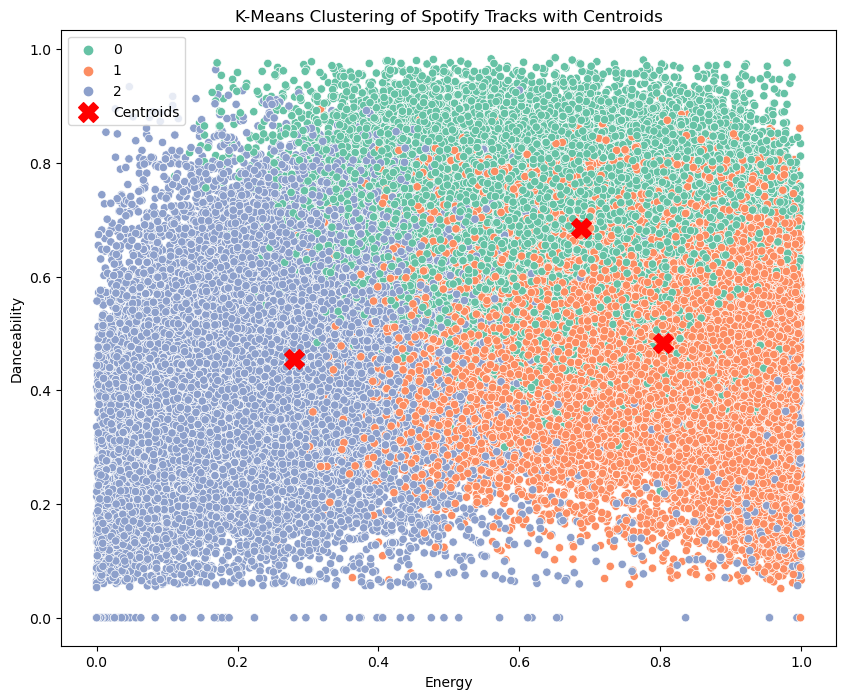

In [36]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

selected_columns = ['popularity', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

features = spotify[selected_columns]

# Standardize the features
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)

# Choose the number of clusters (k) 
k = 3

# Apply k-means clustering
kmeans = KMeans(n_clusters=k, random_state=42)
spotify['cluster'] = kmeans.fit_predict(features_standardized)

# Get cluster centers
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)

# Visualize the clusters and centroids
plt.figure(figsize=(10, 8))
sns.scatterplot(x='energy', y='danceability', hue='cluster', data=spotify, palette='Set2', legend='full')
plt.scatter(cluster_centers[:, 2], cluster_centers[:, 1], marker='X', s=200, c='red', label='Centroids')  # Adjust indices based on your feature selection
plt.title('K-Means Clustering of Spotify Tracks with Centroids')
plt.xlabel('Energy')
plt.ylabel('Danceability')
plt.legend()
plt.show()


C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_

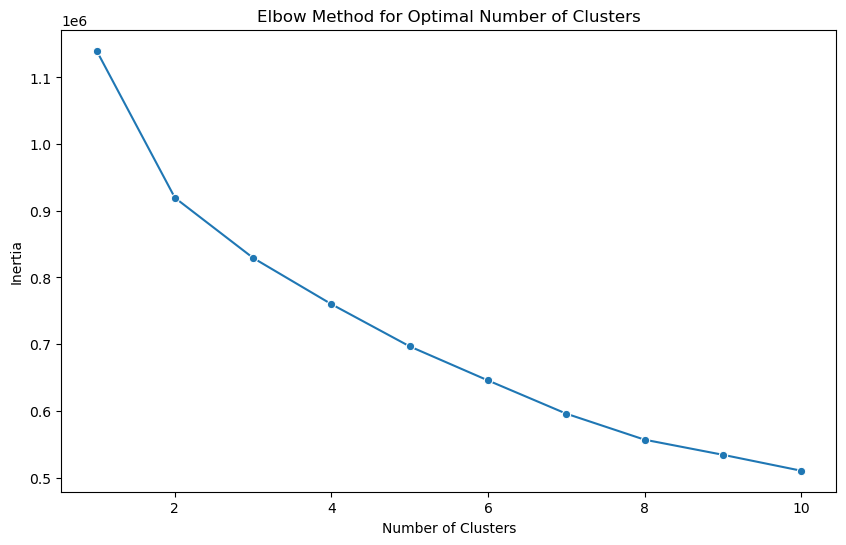

C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [37]:


inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_standardized)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(10, 6))
sns.lineplot(x=range(1, 11), y=inertia, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

optimal_clusters = 3  

kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
spotify['cluster'] = kmeans.fit_predict(features_standardized)

In [38]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(features_standardized, kmeans.labels_)
print(f"Silhouette Score: {silhouette_avg}")


Silhouette Score: 0.14282802818217802


C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


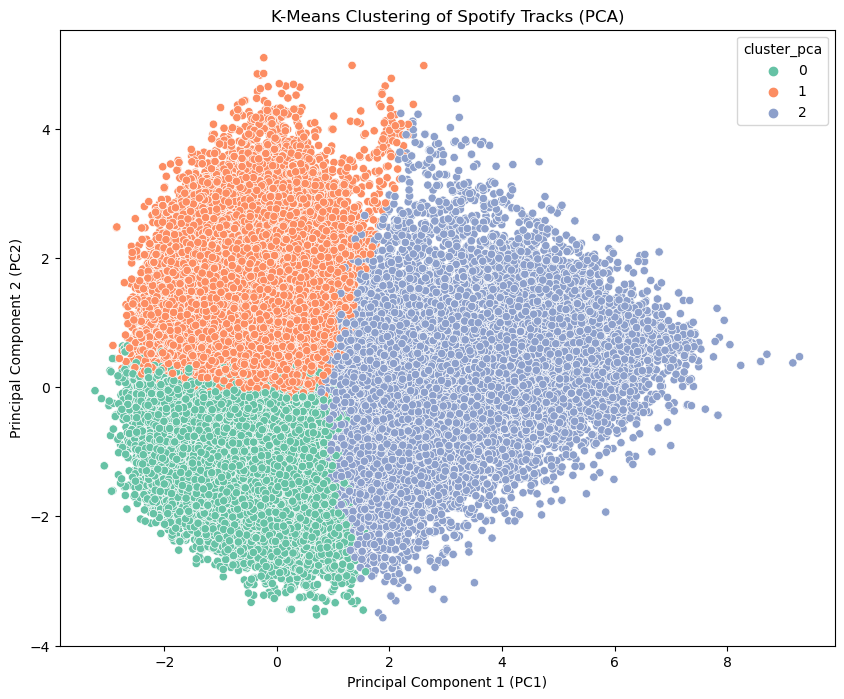

In [46]:

# cluster choosing with PCA
from sklearn.decomposition import PCA


pca = PCA(n_components=len(selected_columns))
features_pca = pca.fit_transform(features_standardized)


k = 3

# Apply k-means clustering on the PCA-transformed features
kmeans = KMeans(n_clusters=k, random_state=42)
spotify['cluster_pca'] = kmeans.fit_predict(features_pca)

# Add PCA components to DataFrame
spotify['PC1'] = features_pca[:, 0]
spotify['PC2'] = features_pca[:, 1]

# Visualize the clusters in the PCA-transformed space
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='cluster_pca', data=spotify, palette='Set2', legend='full')
plt.title('K-Means Clustering of Spotify Tracks (PCA)')
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.show()


In [40]:
#cluster analysis:

cluster_characteristics = spotify.groupby('cluster')[selected_columns].mean()
print(cluster_characteristics)


         popularity  danceability    energy   loudness  speechiness  \
cluster                                                               
0         32.503508      0.686075  0.687837  -6.942451     0.103528   
1         35.590109      0.482473  0.803729  -5.965806     0.079652   
2         30.950694      0.455249  0.280924 -14.726293     0.053446   

         acousticness  instrumentalness  liveness   valence       tempo  
cluster                                                                  
0            0.275047          0.050501  0.198822  0.665648  117.661535  
1            0.088040          0.188760  0.256691  0.341540  135.581302  
2            0.766431          0.322835  0.174183  0.290156  109.677311  


In [44]:
cluster_labels = ['Cluster 1', 'Cluster 2', 'Cluster 3']
spotify['cluster_label'] = spotify['cluster'].map(dict(zip(range(k), cluster_labels)))


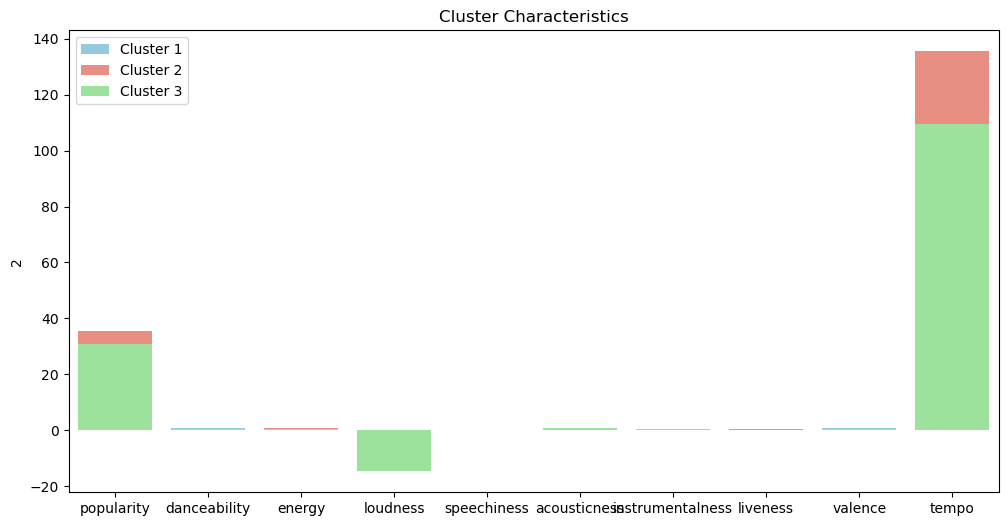

In [45]:
plt.figure(figsize=(12, 6))
sns.barplot(x=cluster_characteristics.columns, y=cluster_characteristics.loc[0], color='skyblue', label='Cluster 1')
sns.barplot(x=cluster_characteristics.columns, y=cluster_characteristics.loc[1], color='salmon', label='Cluster 2')
sns.barplot(x=cluster_characteristics.columns, y=cluster_characteristics.loc[2], color='lightgreen', label='Cluster 3')
plt.title('Cluster Characteristics')
plt.legend()
plt.show()


In [47]:
print("Explained Variance Ratio:", pca.explained_variance_ratio_)


Explained Variance Ratio: [0.28753832 0.14269892 0.12230877 0.10448949 0.09051368 0.08617227
 0.07403144 0.04567166 0.03255733 0.01401811]


In [9]:

features = spotify[['danceability', 'energy', 'tempo']]

# Normalize numerical features
features_normalized = (features - features.min()) / (features.max() - features.min())

# 3. User Input
user_preferences = {'danceability': 0.7, 'energy': 0.8, 'tempo': 120}

# 4. Feature Encoding
user_preferences_encoded = [(user_preferences[feature] - features.min()[feature]) / (features.max()[feature] - features.min()[feature]) for feature in features.columns]

# 5. Similarity Calculation
similarities = cosine_similarity(features_normalized, [user_preferences_encoded])

# 6. Recommendation
spotify['similarity'] = similarities
recommended_tracks = spotify.sort_values(by='similarity', ascending=False)['track_name'].head(5)

print("Recommended Tracks:")
print(recommended_tracks)


Recommended Tracks:
25469       Rasputin - Single Version
66585         The Princess Daisy Song
109827                    Dear Jessie
78882     Stell die Stadt op d'r Kopp
111517                  Blind My Mind
Name: track_name, dtype: object
